<a href="https://colab.research.google.com/github/juanepstein99/DI_Bootcamp/blob/main/Week9/Day2/DailyChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Daily Challenge: Interactive Data Visualization with Matplotlib and Seaborn**

**Your Task:**

**1. Data Preparation:**
* Download and explore the US Superstore data.
* Perform basic data cleaning and preprocessing.

**2. Data Visualization with Matplotlib:**
* Create an interactive line chart to show sales trends over the years.
* Build an interactive map to visualize sales distribution by country.

**3. Data Visualization with Seaborn:**
* Use Seaborn to generate a bar chart showing top 10 products by sales.
* Create a scatter plot to analyze the relationship between profit and discount.

**4. Comparative Analysis:**
* Compare the insights gained from Matplotlib and Seaborn visualizations.
* Document your observations about the ease of use and effectiveness of both tools.

**5. Code and Insights:**
*Write clear, well-documented Python code.
*Include your analysis and insights as comments or markdown cells in your Jupyter notebook.

(9994, 21)
Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


(9994, 22)
  Order Date     Sales    Profit  Discount
0 2016-11-08  261.9600   41.9136      0.00
1 2016-11-08  731.9400  219.5820      0.00
2 2016-06-12   14.6200    6.8714      0.00
3 2015-10-11  957.5775 -383.0310      0.45
4 2015-10-11   22.3680    2.5164      0.20


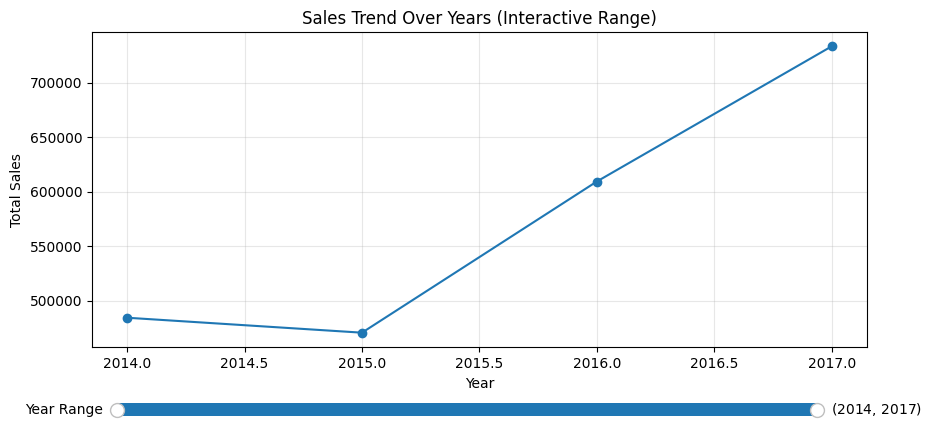

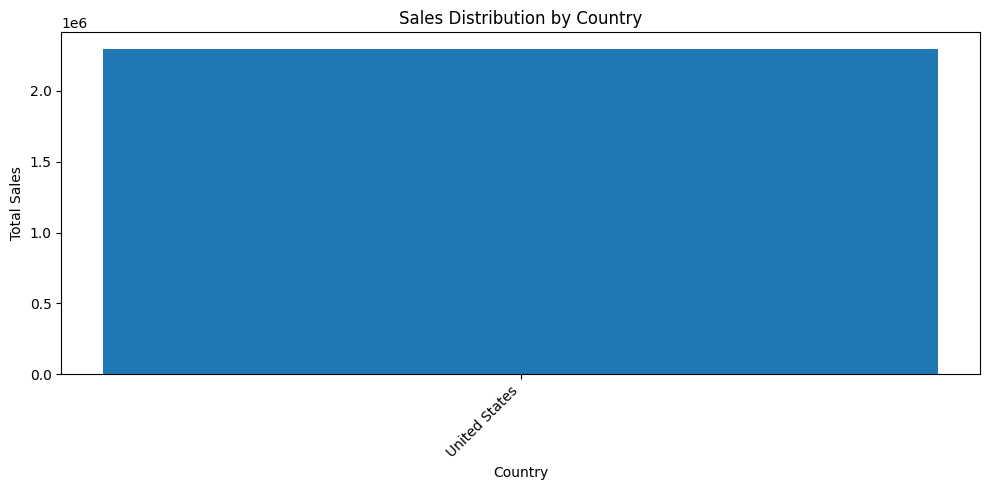

/tmp/ipython-input-1295323591.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_products, x="Sales", y="Product Name", palette="viridis")


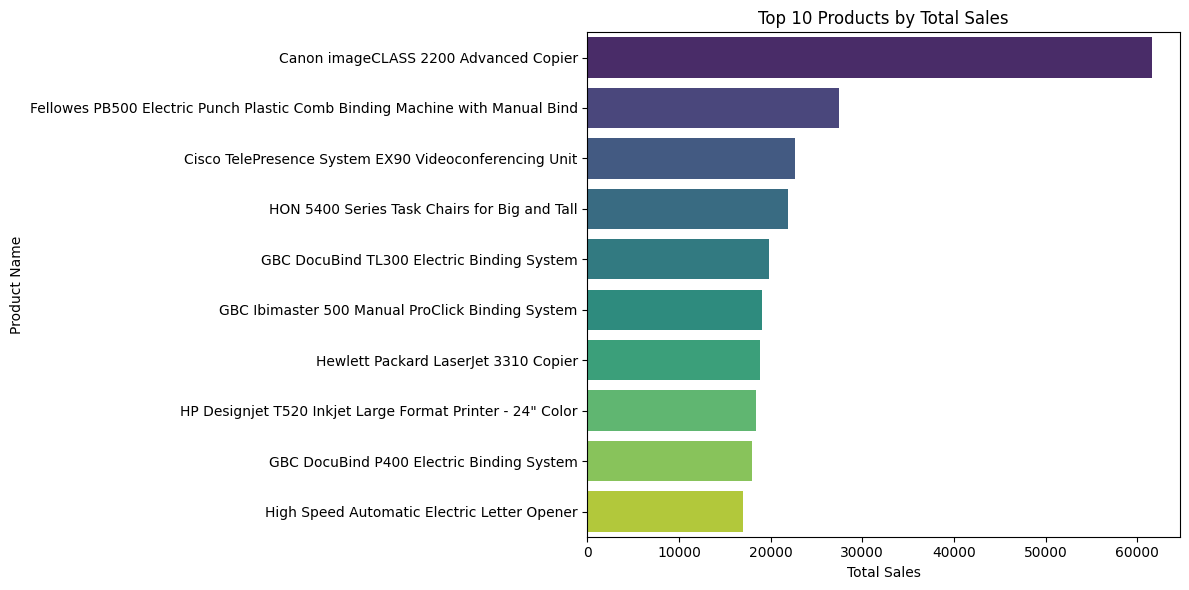

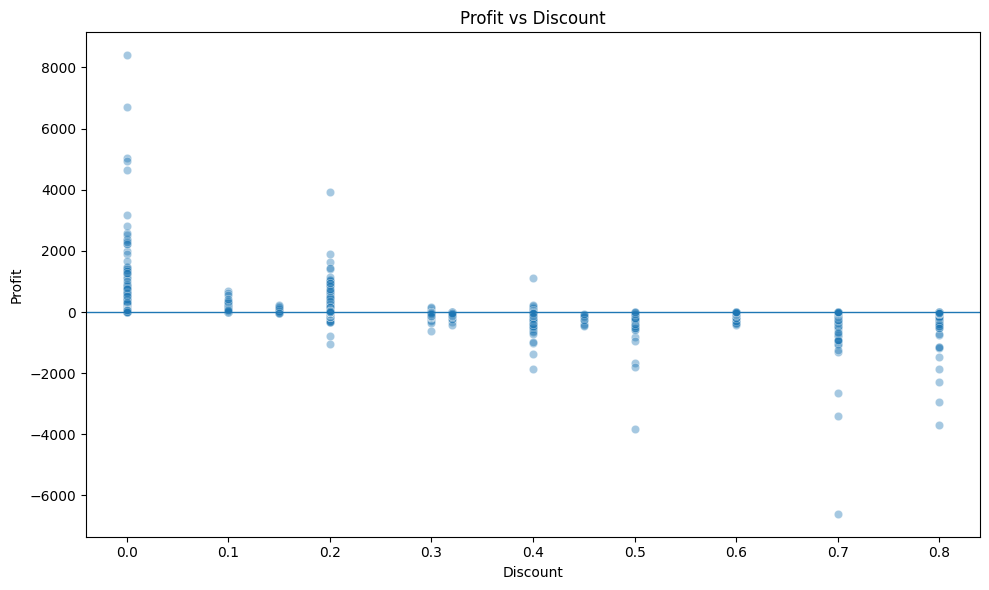

COMPARISON NOTES:
- Matplotlib: better when you want full control + interactive widgets (like the year range slider).
- Seaborn: faster for clean statistical plots with less code (barplots, scatterplots).
- Insight example: Profit tends to drop/turn negative as Discount increases (check the scatter plot).


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import RangeSlider
import seaborn as sns

df = pd.read_excel("US Superstore data.xls")

print(df.shape)
print(df.columns)
display(df.head())

# Convert dates
df["Order Date"] = pd.to_datetime(df["Order Date"], errors="coerce")
df["Ship Date"] = pd.to_datetime(df["Ship Date"], errors="coerce")

# Drop rows with missing essentials
df = df.dropna(subset=["Order Date", "Sales", "Profit", "Discount", "Product Name", "Country"])

# Ensure numeric
for col in ["Sales", "Profit", "Discount", "Quantity"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df = df.dropna(subset=["Sales", "Profit", "Discount"])

# Add Year column
df["Year"] = df["Order Date"].dt.year

print(df.shape)
print(df[["Order Date", "Sales", "Profit", "Discount"]].head())

# MATPLOTLIB - INTERACTIVE LINE CHART (Sales trend by year)

sales_by_year = df.groupby("Year")["Sales"].sum().sort_index()

years = sales_by_year.index.values
sales = sales_by_year.values

fig, ax = plt.subplots(figsize=(10, 5))
plt.subplots_adjust(bottom=0.25)

(line,) = ax.plot(years, sales, marker="o")
ax.set_title("Sales Trend Over Years (Interactive Range)")
ax.set_xlabel("Year")
ax.set_ylabel("Total Sales")
ax.grid(True, alpha=0.3)

# Range slider
slider_ax = plt.axes([0.15, 0.1, 0.7, 0.05])
year_slider = RangeSlider(
    ax=slider_ax,
    label="Year Range",
    valmin=years.min(),
    valmax=years.max(),
    valinit=(years.min(), years.max()),
    valstep=1
)

def update(val):
    start, end = year_slider.val
    mask = (years >= start) & (years <= end)
    line.set_data(years[mask], sales[mask])
    ax.set_xlim(start, end)
    ax.relim()
    ax.autoscale_view(scalex=False, scaley=True)
    fig.canvas.draw_idle()

year_slider.on_changed(update)
plt.show()

# MATPLOTLIB - "MAP" SALES BY COUNTRY

country_sales = df.groupby("Country")["Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(country_sales.index.astype(str), country_sales.values)
plt.title("Sales Distribution by Country")
plt.xlabel("Country")
plt.ylabel("Total Sales")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# SEABORN - TOP 10 PRODUCTS BY SALES (bar chart)

top10_products = (
    df.groupby("Product Name")["Sales"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(12, 6))
sns.barplot(data=top10_products, x="Sales", y="Product Name", palette="viridis")
plt.title("Top 10 Products by Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

# SEABORN - PROFIT vs DISCOUNT (scatter)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Discount", y="Profit", alpha=0.4)
plt.title("Profit vs Discount")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.axhline(0, linewidth=1)  # Profit = 0 line
plt.tight_layout()
plt.show()

# COMPARATIVE ANALYSIS

print("COMPARISON NOTES:")
print("- Matplotlib: better when you want full control + interactive widgets (like the year range slider).")
print("- Seaborn: faster for clean statistical plots with less code (barplots, scatterplots).")
print("- Insight example: Profit tends to drop/turn negative as Discount increases (check the scatter plot).")